# Compare Temperature Across Locations

Minimum and Maximum Temperature Comparison
* TMAX: The maximum temperature on a day
* TMIN: The minimum temperature on a day
* TAVG: (If available) The average temperature on a day

Mininum Temperature for Gardeners
* [USDA Plant Hardiness Zones](#usda_hardiness_zones)

The Ideal Temperature (Location)
* Based on TMAX

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import functions

In [2]:
# Station 1 - Clatskanie
df = pd.read_csv('../data/temperature_97016.csv')
df = df[df['STATION']=='USC00351643']
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['year']<2025]

# Verify station 
# functions.view_station_date_ranges(df)
# geo_data = pd.read_csv('../data/geo_data.csv')
# functions.map_stations(geo_data)

assert len(df['STATION'].unique()) == 1

In [3]:
# Station 1 - Chicago
df = pd.read_csv('../data/temperature_chicago_ord.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

In [4]:
# Station 2 - Portland
df = pd.read_csv('../data/temperature_97218.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

df2 = df.copy()

In [5]:
# Merge the stations into one df
# df1_suffix = '_CLATSKANIE'
df1_suffix = '_ORD'
df2_suffix = '_PDX'
df = df1.merge(df2,
                on=['DATE', 'year'],
                how='inner',
                suffixes=(df1_suffix, df2_suffix)
)

In [6]:
# df.describe()
df

,STATION_ORD,NAME_ORD,DATE,TAVG_ORD,TMAX_ORD,TMIN_ORD,year,month_ORD,STATION_PDX,NAME_PDX,TAVG_PDX,TMAX_PDX,TMIN_PDX,month_PDX
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1990-01-01,NaN,30,25,1990,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,47,36,1
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1990-01-02,NaN,39,26,1990,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,49,35,1
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1990-01-03,NaN,44,33,1990,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,48,41,1
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1990-01-04,NaN,46,25,1990,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,53,46,1
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1990-01-05,NaN,37,21,1990,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,56,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-27,47.0,52,45,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",49.0,53,45,12
12780,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-28,50.0,51,42,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",51.0,55,48,12
12781,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-29,44.0,46,36,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",49.0,52,43,12
12782,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-30,37.0,42,32,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.0,50,41,12


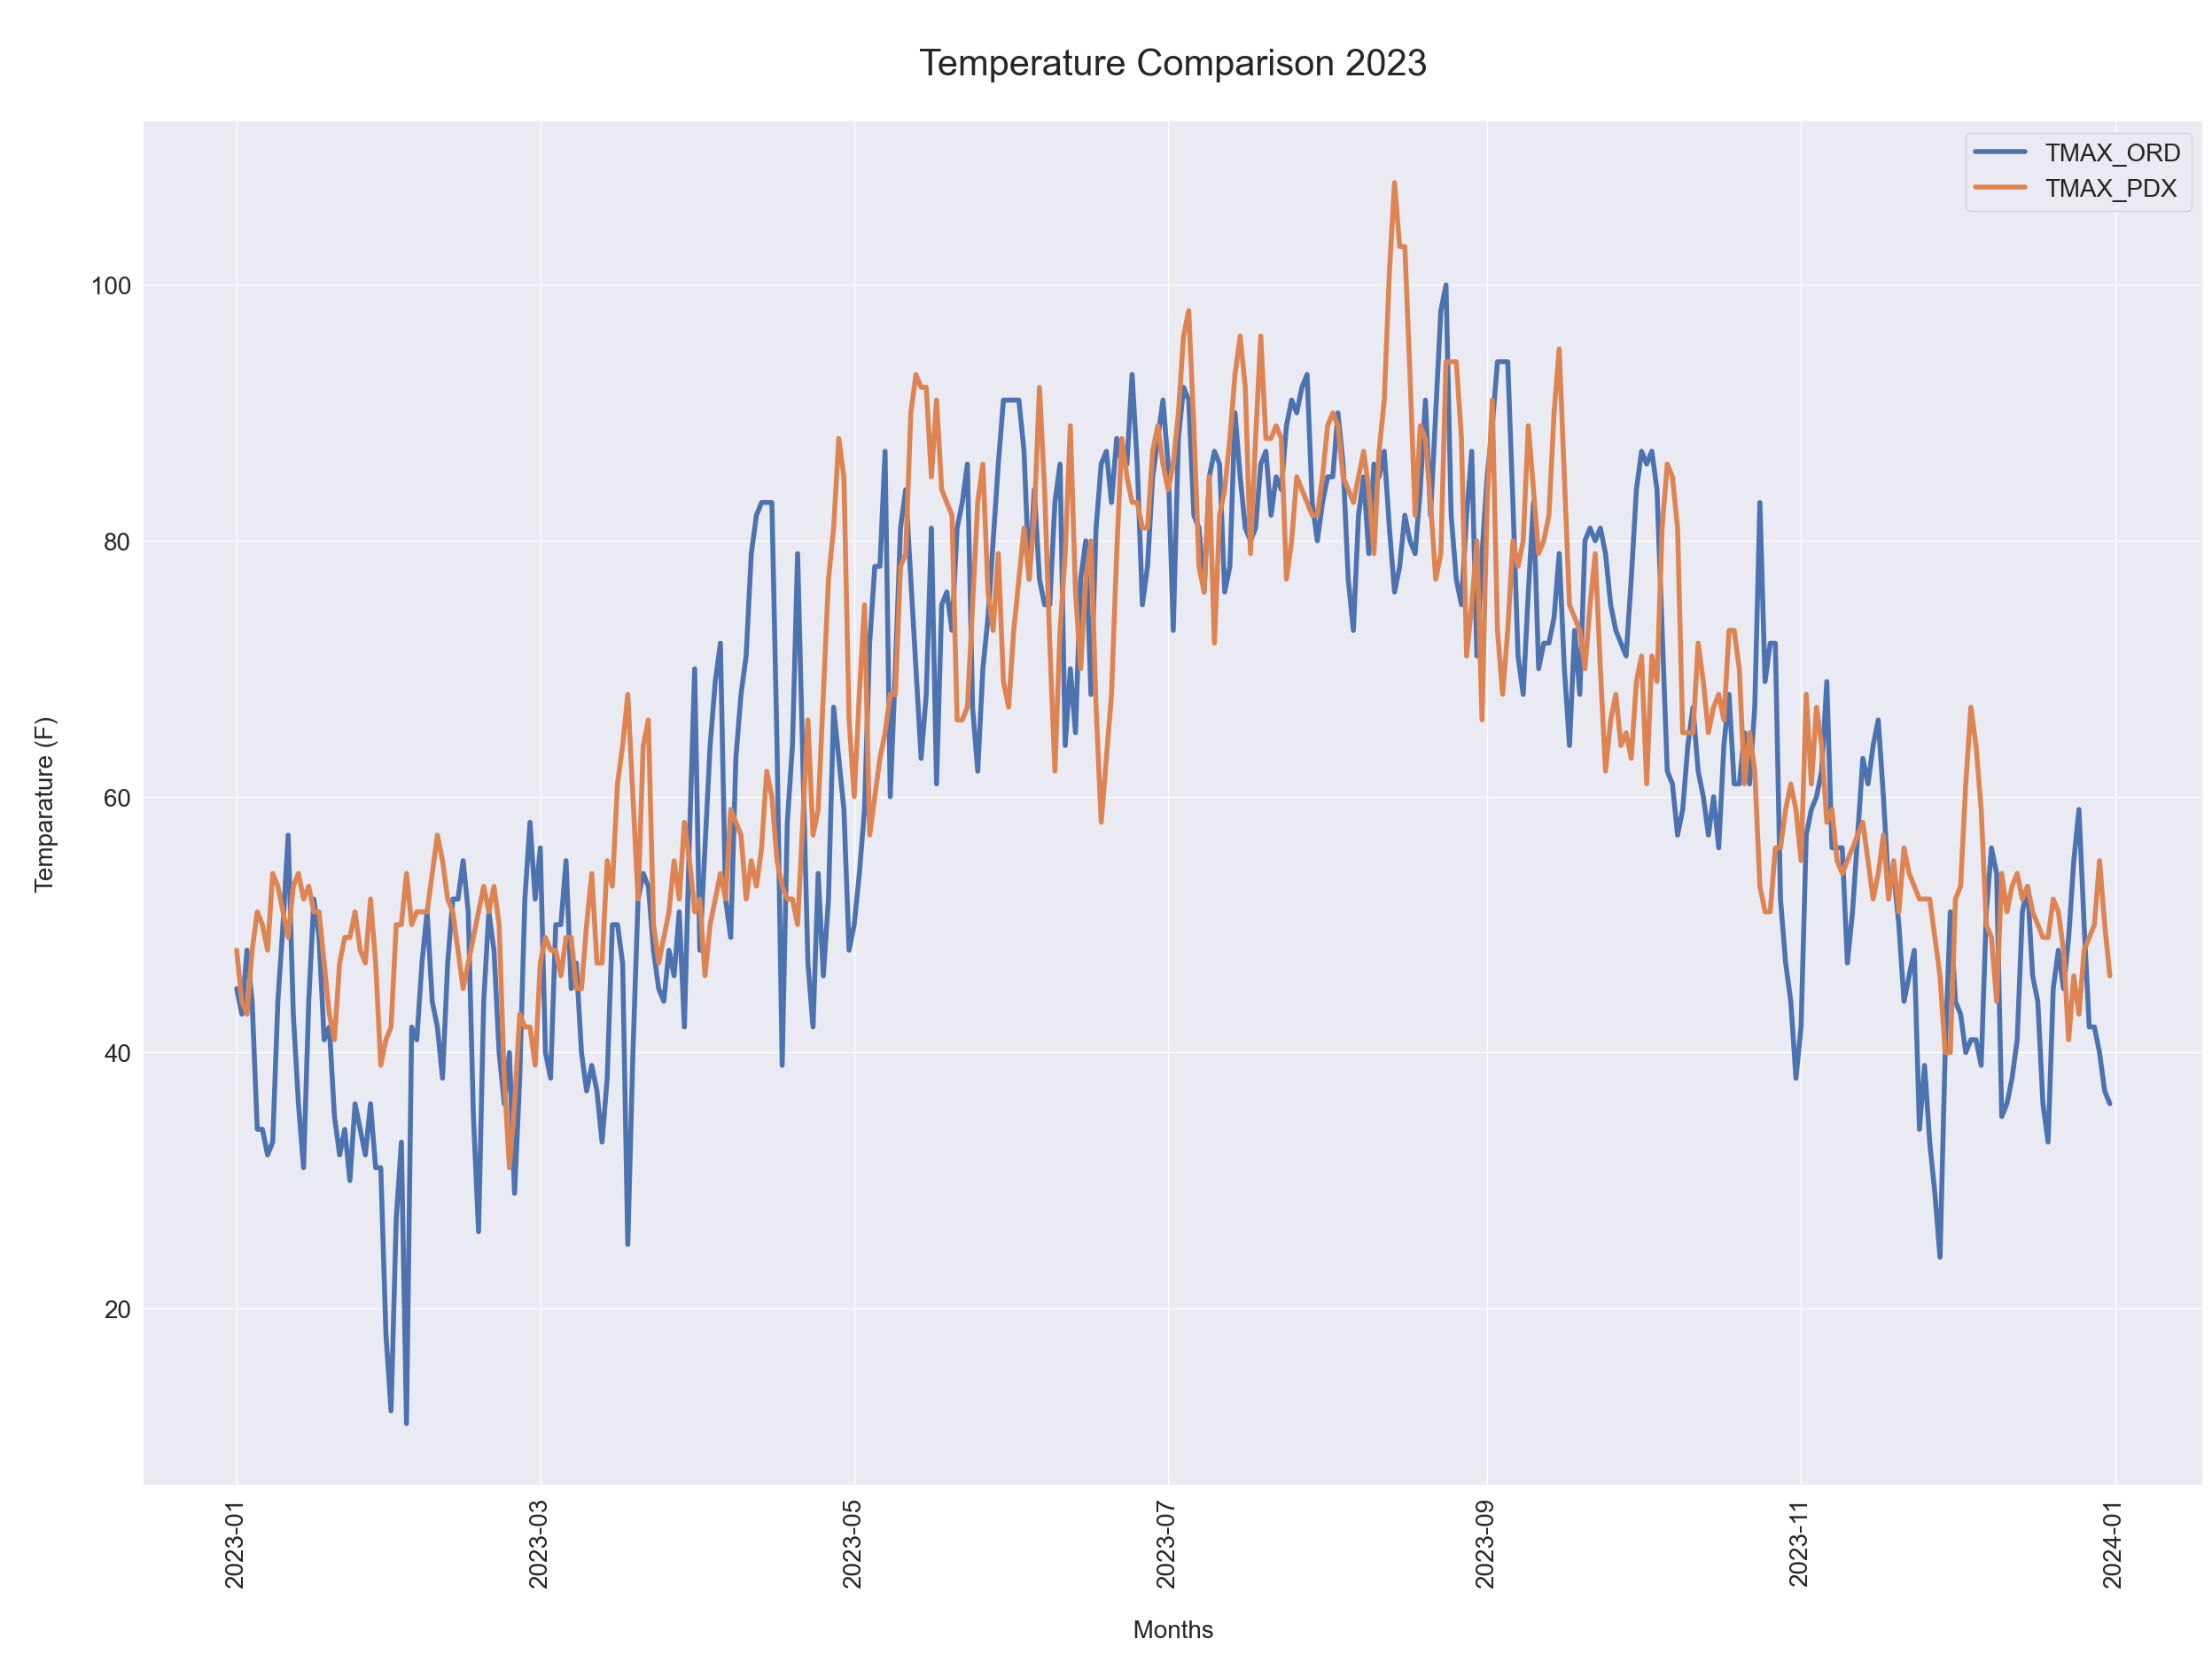

In [7]:
# Plot maximum temperature
pmax = functions.plot_temp_compare(df, 'TMAX', 2023)
# pmax.savefig('tmax_compare.jpg') 

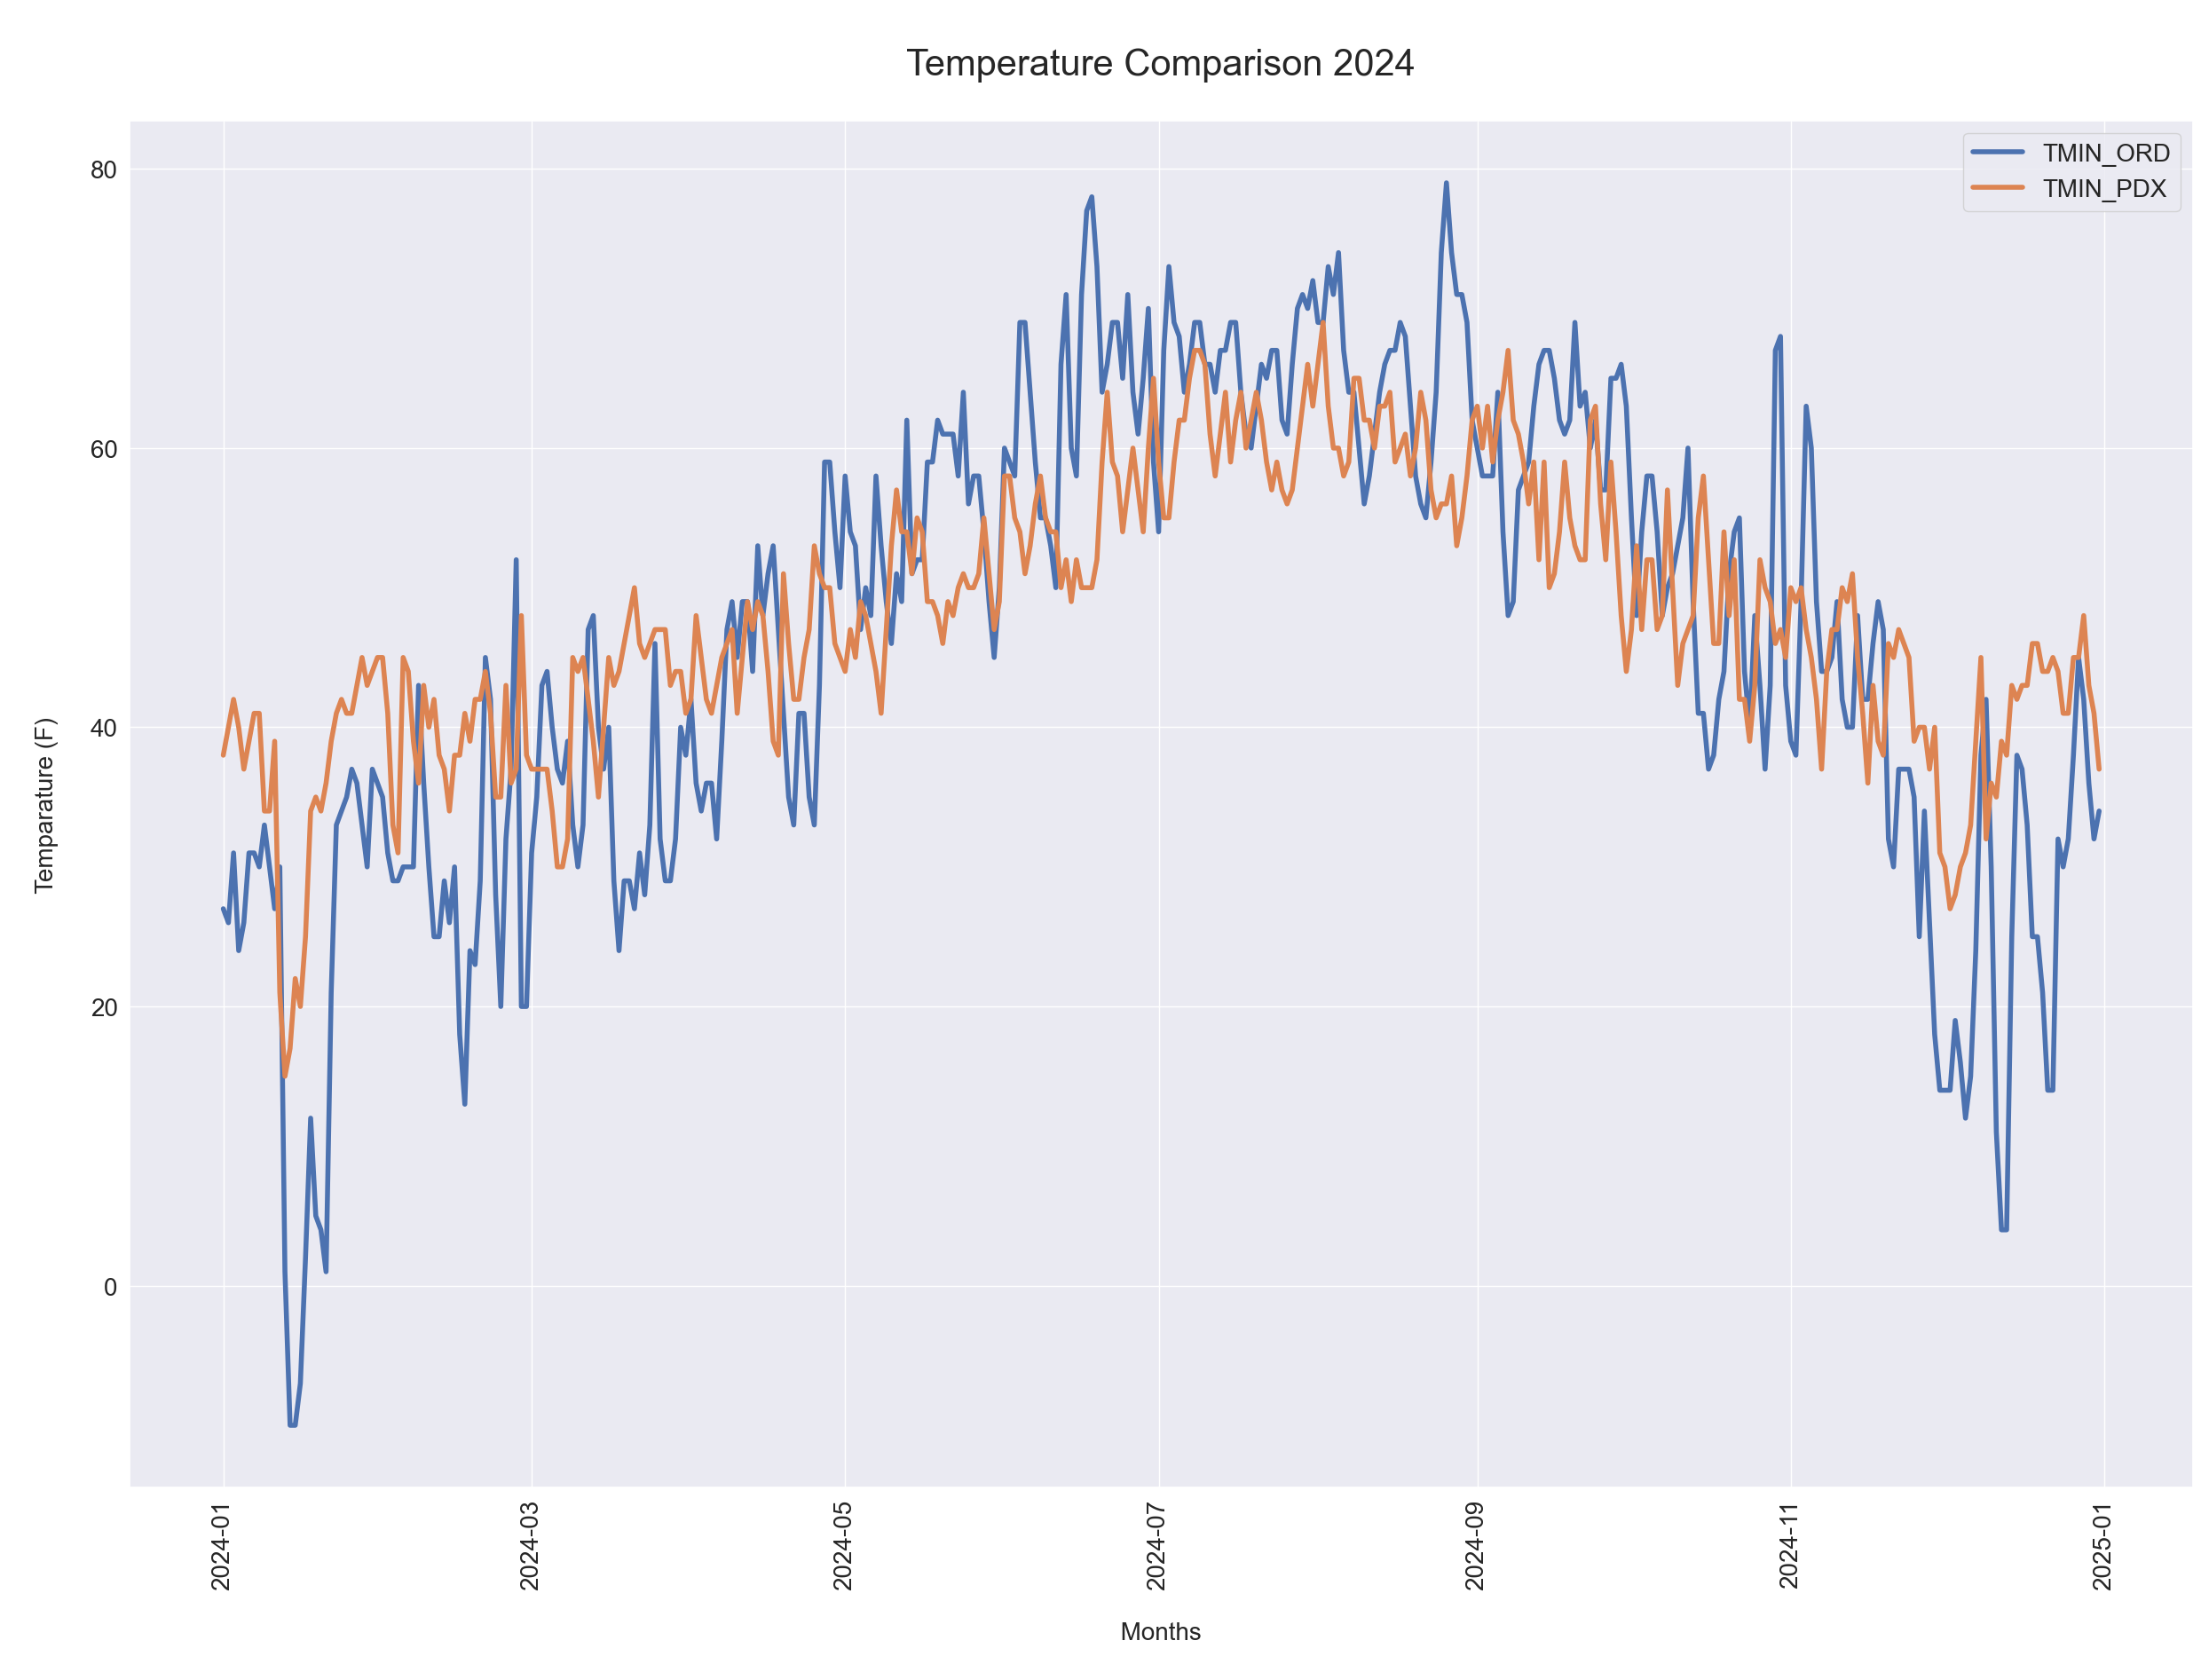

In [8]:
# Plot minimum temperature
pmin = functions.plot_temp_compare(df, 'TMIN', 2024)
# pmin.savefig('tmin_compare.jpg') 

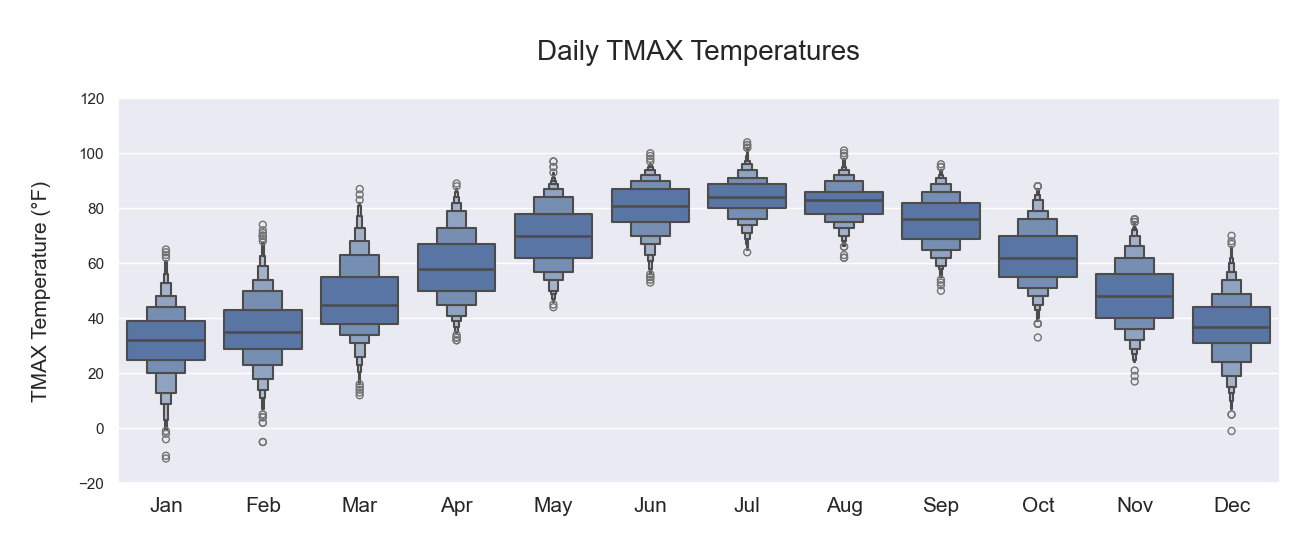

<Axes: title={'center': '\nDaily TMAX Temperatures\n'}, xlabel=' ', ylabel='\nTMAX Temperature (°F)\n'>

In [9]:
functions.plot_monthly_temp_plots(df1, metric='TMAX', ylim_low=-20, ylim_high=120)

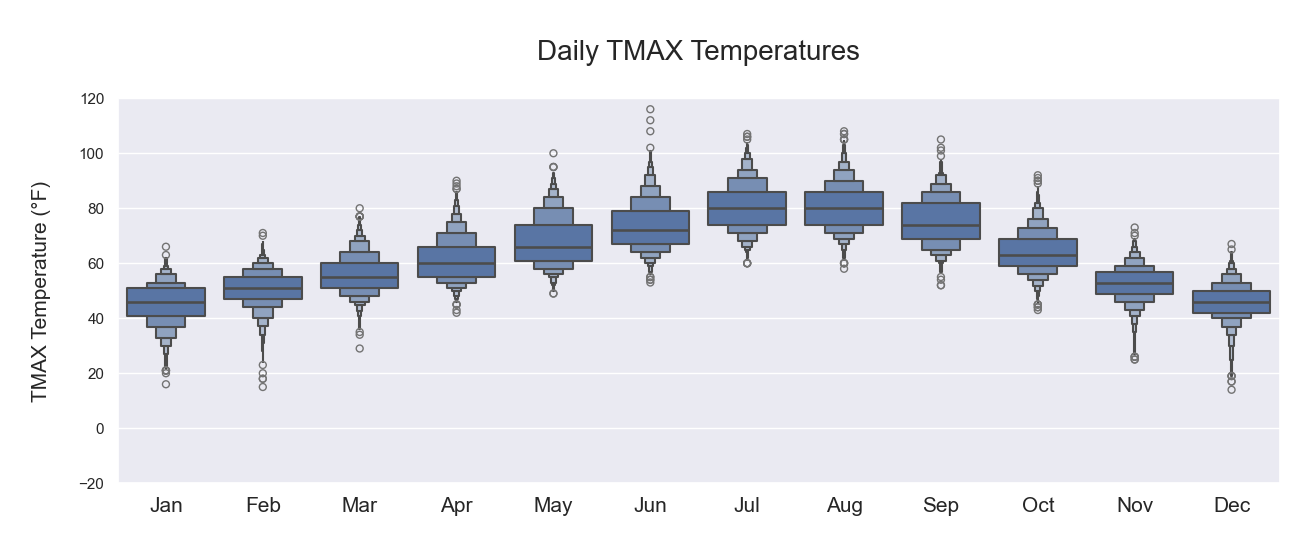

<Axes: title={'center': '\nDaily TMAX Temperatures\n'}, xlabel=' ', ylabel='\nTMAX Temperature (°F)\n'>

In [10]:
functions.plot_monthly_temp_plots(df2, metric='TMAX', ylim_low=-20, ylim_high=120)

<a id="usda_hardiness_zones"></a>

## USDA Plant Hardiness Zones
* A USDA hardiness zone is defined by the minimum annual temperature at a station, averaged over the last 30 years
* For example, by this metric
    * USDA Zone 8a falls within 10°F and 15°F
    * USDA Zone 8b falls within 15°F and 20°F
    * USDA Zone 9a falls within 20°F and 25°F

In [ ]:
# THIS SHOULD BE A FUNCTION 
# Get Daily Minimum Temperature data
df = pd.read_csv('../data/temperature_97016.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['STATION']=='USC00351643']
df2 = pd.read_csv('../data/temperature_chicago_ord.csv')
# df2 = pd.read_csv('../data/temperature_97218.csv')
df2 = df2.assign(year = pd.to_datetime(df['DATE']).dt.year)
df2 = df2.assign(month = pd.to_datetime(df['DATE']).dt.month)

# Verify that there is only one station per df
assert len(df1.STATION.unique()) == 1
assert len(df2.STATION.unique()) == 1

# Merge the stations into one df
df1_suffix = '_CLATSKANIE'
df2_suffix = '_PDX'
df = df1.merge(df2,
          on=['DATE', 'year'],
          how='inner',
          suffixes=(df1_suffix, df2_suffix)
          ).drop(['STATION_PDX', 'STATION_CLATSKANIE'], axis=1)

In [ ]:
# Get weather station location data 
df_stations = pd.read_csv('../data/geo_data.csv')
df_stations = df_stations[df_stations['STATION'].isin(list(set(df1['STATION'].unique()).union(df2['STATION'].unique())))]

# Map the stations 
functions.map_stations(df_stations,
                       default_lat=45.7,
                       default_long=-122.7,
                       default_zoom=9,)

In [ ]:
# View the minimium temperature for each year
tmin = df.groupby('year', as_index=False).agg({'TMIN_CLATSKANIE': 'min', 'TMIN_PDX': 'min'})

# Check for null values
print('null values', tmin.isnull().sum().sum())

tmin

In [ ]:
# Calculate the USDA hardiness zone for each station and year

# Calculate the trailing average TMIN_PDX for the last 30 years, for each year
tmin['PDX Hardiness Zone'] = tmin['TMIN_PDX'].rolling(window=30, min_periods=30).mean()
tmin['Clatskanie Hardiness Zone'] = tmin['TMIN_CLATSKANIE'].rolling(window=30, min_periods=30).mean()
tmin

In [ ]:
# Make the wide format long, for the seaborn lineplot
tmin_long = tmin.melt(id_vars='year', value_vars=['TMIN_CLATSKANIE', 'TMIN_PDX'],
                      var_name='station', value_name='tmin')
tmin_long

In [ ]:
# sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
p = sns.lineplot(data=tmin_long,
             x='year',
             y='tmin',
             hue='station',
             palette=['green', 'orange'],
             marker='o',    
             markersize=5,
             linewidth=2,
             style='station',
             dashes=False,
            #  legend='full',
                )

# add a title to the plot
plt.title('\nMinimum Temperature by Year and Station\n')
plt.ylim(-20, 40)
p.set_xlabel("\nYear", fontsize=12, rotation=0)
p.set_ylabel("\nMinimum Temperature per Year (°F)\n", fontsize=12, rotation=90)

# Suppress printouts
plt.show()


In [ ]:
# How has the USDA hardiness zone changed year-by-year?
# This makes for better storytelling

# Make the wide format long, for the seaborn lineplot
usdahz = tmin.melt(id_vars='year', value_vars=['Clatskanie Hardiness Zone', 'PDX Hardiness Zone'],
                      var_name='station', value_name='USDA Hardiness Zone').dropna()
usdahz

In [ ]:
# THIS FAILED TO RUN WITH THE CHICAGO DATA --> AND TOOK MORE THAN A MINUTE
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))
p = sns.lineplot(data=usdahz,
             x='year',
             y='USDA Hardiness Zone',
             hue='station',
             palette=['green', 'blue'],
             marker='o',    
             markersize=5,
             linewidth=2,
             style='station',
             dashes=False,
                )

# Superimpose colored bands for USDA zones
# https://colorbrewer2.org/#type=sequential&scheme=YlOrBr&n=3
p.axhspan(10, 15, color='#b7efb2', alpha=0.15, label='Zone 7b (5-10°F)')
p.axhspan(10, 15, color='#fff7bc', alpha=0.15, label='Zone 8a (10-15°F)')
p.axhspan(15, 20, color='#fec44f', alpha=0.15, label='Zone 8b (15-20°F)')
p.axhspan(20, 25, color='#d95f0e', alpha=0.15, label='Zone 9a (20-25°F)')

# Add zone labels
p.text(x=2021, y=13, s='8a', color='black', fontsize=14, va='center')
p.text(2021, 18, '8b', color='black', fontsize=14, va='center')
p.text(2021, 23, '9a', color='black', fontsize=14, va='center')

plt.title('\nUSDA Hardiness Zone by Year\n')
plt.ylim(10, 25)
# label the y-axes for every interval of 1
p.set_yticks(np.arange(10, 26, 1))
p.set_yticklabels(['10°F', '11°F', '12°F', '13°F', '14°F', '15°F', '16°F', '17°F', '18°F', '19°F', '20°F', '21°F', '22°F', '23°F', '24°F', '25°F'])
p.set_xlabel("\nYear", fontsize=12, rotation=0)
p.set_ylabel("\n30-year-Average-Minimum Temperature (°F)\n", fontsize=12, rotation=90)

plt.legend(loc='upper left')
plt.show()

## The Ideal Temperature (Location)
* Based on TMAX

In [ ]:
def ideal_tmax(df: pd.DataFrame, ideal_min: int, ideal_max: int) -> pd.DataFrame:
    """
    If we defined ideal weather as days where the high temperature is between X and Y degrees, 
        then how many days per year of this ideal high temperature happen per location?
    
    Displays the number of days per year where the maximum temperature is between ideal_min and ideal_max.

    Args:
        df (DataFrame): DataFrame containing temperature data with columns 'TMAX_PDX' and 'TMAX_CLATSKANIE'.
        ideal_min (int): Minimum temperature for ideal weather.
        ideal_max (int): Maximum temperature for ideal weather.
    Returns:
        DataFrame: A DataFrame with the number of ideal weather days per year for both locations
        and the difference in counts.
    """
    ideal_weather1 = df[(df['TMAX_PDX'] >= ideal_min) & (df['TMAX_PDX'] <= ideal_max)]
    ideal_weather1 = ideal_weather1.groupby(['year'], as_index=False).agg({'TMAX_PDX': 'count'})

    ideal_weather2 = df[(df['TMAX_CLATSKANIE'] >= ideal_min) & (df['TMAX_CLATSKANIE'] <= ideal_max)]
    ideal_weather2 = ideal_weather2.groupby(['year'], as_index=False).agg({'TMAX_CLATSKANIE': 'count'})

    # Merge the two ideal weather dataframes
    ideal_weather = ideal_weather1.merge(ideal_weather2,
                                        on='year',
                                        how='inner',
                                        suffixes=('_PDX', '_CLATSKANIE'))
    ideal_weather['difference'] = ideal_weather['TMAX_CLATSKANIE'] - ideal_weather['TMAX_PDX']

    return ideal_weather.sort_values(by='year', ascending=False)

In [ ]:
# Collect data for bar plots with the output of this function 
great_days = ideal_tmax(df, 60, 80).head(5).sort_values(by='year', ascending=True)
fine_days = ideal_tmax(df, 50, 85).head(5).sort_values(by='year', ascending=True)
okay_days = ideal_tmax(df, 40, 85).head(5).sort_values(by='year', ascending=True)

In [ ]:
# Prepare data for seaborn barplot
great_days_long = great_days.melt(id_vars='year', value_vars=['TMAX_PDX', 'TMAX_CLATSKANIE'],
                                 var_name='Station', value_name='Great Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=great_days_long, x='year', y='Great Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Great Weather Days (60-80°F)')
plt.title('\nNumber of Great Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for seaborn barplot
fine_days_long = fine_days.melt(id_vars='year', value_vars=['TMAX_PDX', 'TMAX_CLATSKANIE'],
                                 var_name='Station', value_name='Fine Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=fine_days_long, x='year', y='Fine Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Fine Weather Days (50-85°F)')
plt.title('\nNumber of Fine Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
# create the same seaborn plot for okay_days
okay_days_long = okay_days.melt(id_vars='year', value_vars=['TMAX_PDX', 'TMAX_CLATSKANIE'],
                               var_name='Station', value_name='Okay Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=okay_days_long, x='year', y='Okay Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Okay Weather Days (40-85°F)')
plt.title('\nNumber of Okay Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()